In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
image_path = r"C:\Users\samar\OneDrive\Desktop\AI_Project\E-KYC_Computer_Vision\aadharImages\aadhar.png"


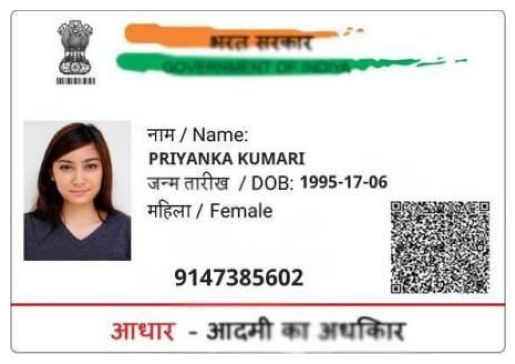

In [13]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

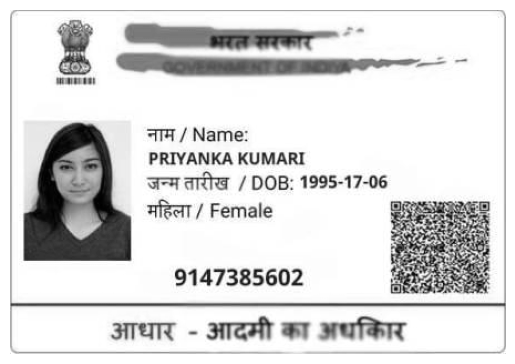

In [14]:
gray1 =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap='gray')
plt.axis("off")
plt.show()

In [15]:
#Mean Blurred


In [16]:
# blurred =  cv2.GaussianBlur(gray, (5, 5), 0)

# plt.imshow(blurred, cmap='gray')
# plt.axis("off")
# plt.show()

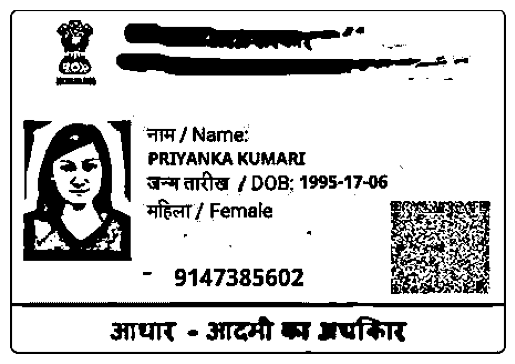

True

In [19]:
#adaptive thresholding

adp_thresh1 = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh1, cmap='Greys_r')
plt.axis("off")
plt.show()

cv2.imwrite(r'C:\Users\samar\OneDrive\Desktop\AI_Project\E-KYC_Computer_Vision\aadharImages\temp.png', adp_thresh1)

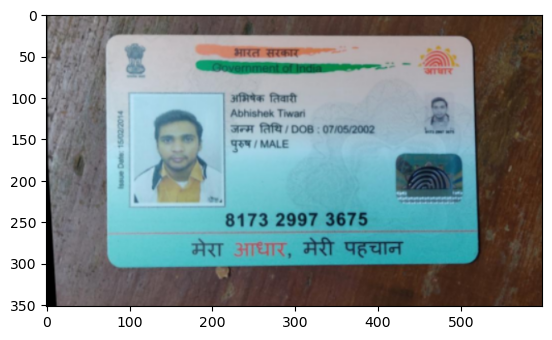

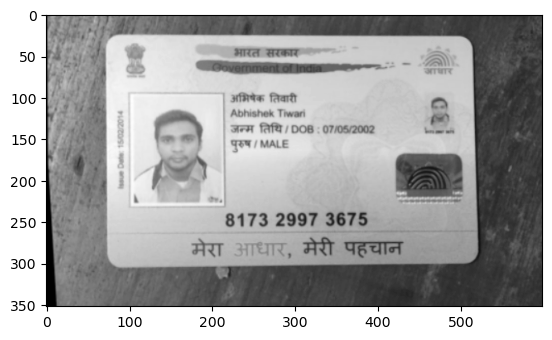

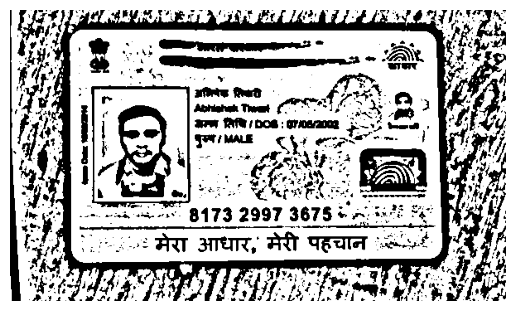

contours (72, 25, 450, 281)
Area 122552.0


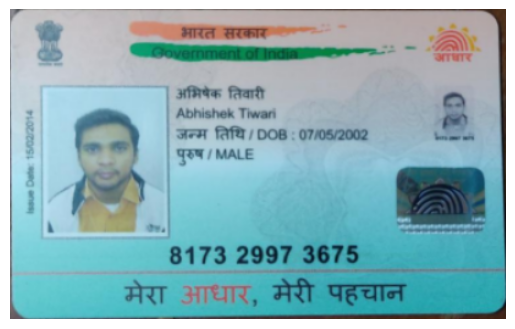

In [24]:
#Contour detection

imgPath = r"C:\Users\samar\OneDrive\Desktop\AI_Project\E-KYC_Computer_Vision\aadharImages\aadhar2.png"
img = cv2.imread(imgPath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

#Graying the image

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

adp_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

cv2.imwrite(r'C:\Users\samar\OneDrive\Desktop\AI_Project\E-KYC_Computer_Vision\aadharImages\temp1.png',adp_thresh)

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [21]:
#OCR Engines to detect the text from image

import easyocr


In [27]:
img_path = r"C:\Users\samar\OneDrive\Desktop\AI_Project\E-KYC_Computer_Vision\aadharImages\temp1.png"
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)
confidence_threshold =  .80
filtered_text = ""  # Initialize an empty string to store filtered text
for text in result:
    bounding_box, recognized_text, confidence = text
    if confidence > confidence_threshold:
        filtered_text += recognized_text + "|"

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [28]:
filtered_text

'8173 2997 3675|'